In [20]:
import numpy as np
class Perceptron(object):
    def __init__(self,eta=0.01,n_iter=10):
        self.eta=eta
        self.n_iter=n_iter
    def fit(self,X,y):
        self.w_=np.zeros(1+X.shape[1])
        self.errors_=[]
        
        for _ in range(self.n_iter):
            errors=0
            for xi,target in zip(X,y):
                update = self.eta * (target-self.predict(xi))
                self.w_[1:]+=update*xi
                self.w_[0]+=update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,-1)

In [21]:
import pandas as pd
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data' ,header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


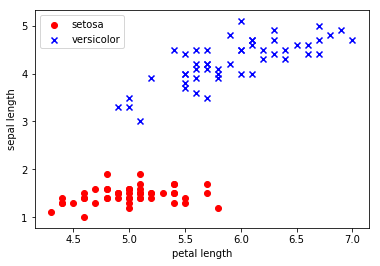

In [22]:
import matplotlib.pyplot as plt
import numpy as np
y=df.iloc[0:100, 4].values
y=np.where(y == 'Iris-setosa',-1,1)
X=df.iloc[0:100,[0,2]].values
plt.scatter(X[:50,0],X[:50, 1], color='red', marker ='o', label='setosa')
plt.scatter(X[50:100,0],X[50:100, 1], color='blue', marker ='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

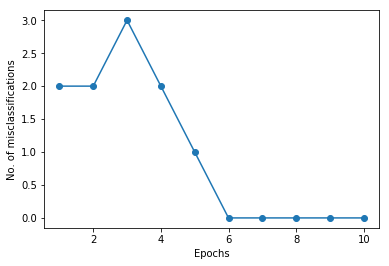

In [24]:
ppn=Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('No. of misclassifications')
plt.show()

In [10]:
# Perceptron model using SCIKIT_LEARN
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('MISCLASSIFIED SAMPLES: %d' % (y_test != y_pred).sum())